# Project 1: Golf - Euler Method

## William Willmon
### Dr. Danielle McDermott
### Pacific University


### Projectile Motion

Projectile motion is a concept that is studied a lot in Physics. It is observed from a classical mechanics stand point and can be modelled any where from simply, by neglecting all forces other than that of gravity, to as realistic as possible, by including factors such as drag, spin, and even the Coriolis effect. All projectile motions can be represented with a differential equation based on time and using these equations we can model the trajectory of an object. In this project the projectile motion of both basketball and a ping pong ball. In both cases there will be an initial velocity, a backspin, and a drag force. With these three the trajectory of the projectile can then be modeled using the free body diagram below.

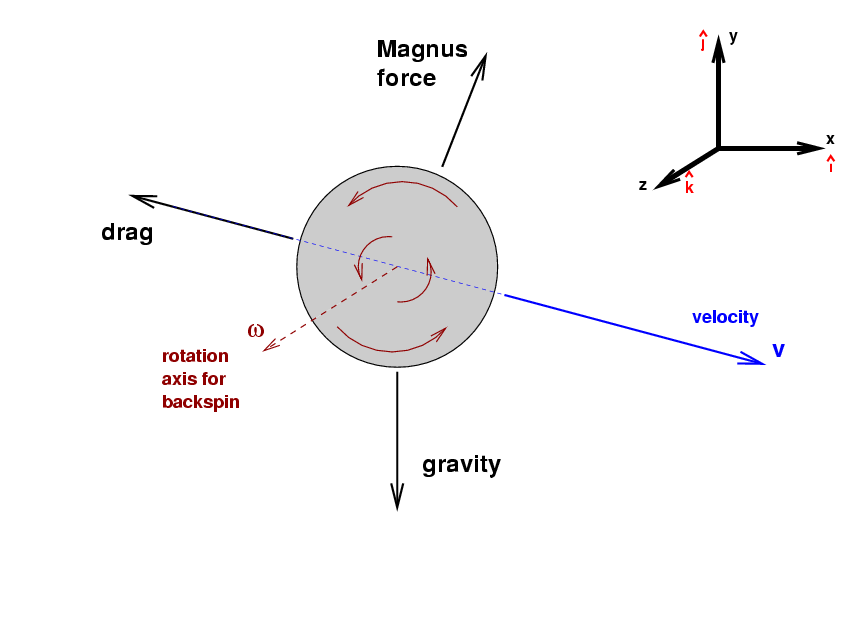

This diagram shows all of the forces acting upon the projectile, the Magnus force being that created by the sping. With these forces the acceleration in the x and y direction can found. With calculus and physics the trajectory can then be modelled as done below.
### Euler's Method

One way to model the trajectory when given differential equations is to use Euler's Method. To use Euler's Method it is important to know the equation below by (Eq. 1).

$$
x(t+h) = x(t) + hf(x,t)
$$          

This method will be used to model the projectile motion of a single ping pong ball being shot at 9 degrees with an initial velocity of 3 m/s. The ball is experiencing a drag force and a backspin of 1 rad/s. Once that has been done the same method can be used to observe how the different backspins of 0.5, 1, 1.5, and 2 rad/s can affect the trajectory of a basketball being shot at 9 m/s with an angle of 45 degrees. To do so it is important that all the coefficients and constants are the same for each case.

The projectile motion of both objects is modelled from one set of equations, which are the accelerations in the x and y direction that are affecting the balls. The Euler Method is used to find the velocity in both the x and y direction using the acceleration equation below, (Eq. 2) and (Eq. 3).

$$
\frac{dv_x}{dt} = - \frac{F_{drag,x}}{m} - \frac{S_0\omega v_y}{m}
$$
$$
\frac{dv_y}{dt} = - \frac{F_{drag,y}}{m} + \frac{S_0\omega v_x}{m} - g
$$

Where (Eq. 2) is the acceleration in the x and (Eq. 3) is the acceleration in the y. These are consisting of,

$ \frac{F_{drag}}{m}$ - the acceleration due to the drag force  

$ \frac{S_0\omega v}{m}$ - the acceleration due to spin

$g$ - the force due to Earth's gravity

And the drag is given in (Eq.4.)

$$
F_{drag} = -C\rho A v^2
$$

Using (Eq. 2) and (Eq. 3) as the $f(x,t)$ in (Eq. 1), and $h$ being the width of the step being iterated it is then possible create lists of values that represent that of a velocity over time curve in both directions. Once these curves are obtained. The trapezoidal rule is then used to evaluate the velocity curves to create another set of lists that contain both x and y positions over time. The two lists can then be graphed, y as a function of x. This graph will give an accurate display of the trajectory.

There are also certain boundary conditions that must be followed. When calculating the trajectory of a projectile it is important to be sure that the velocities are being calculated in a reasonable time or until they reach a height of zero. Otherwise the velocities could become to great giving poor graphs for both velocity and trajectory. The final boundary conditions come when integrating the velocity functions. If the time intervals being used for the trapezoidal rule are too wide then the model will not be accurate.



### Exercise 1 -  Projectile Motion of Ping Pong Ball

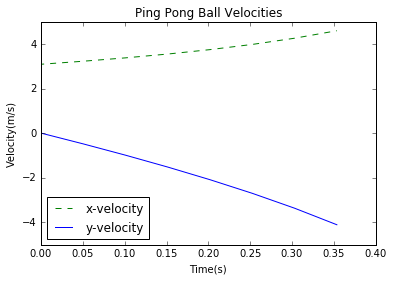

In [1]:
import math
import numpy as np
from matplotlib.pylab import plt
% matplotlib inline

# Declare variables to calculate behavior of ping pong ball
C = 0.5 
S0_m = 0.040
M = 2.7/1000 # kg
w = 1 # rad/s
theta = math.pi/20 #rad
a = 0.0 # m
b = 5   # m
N = 100
h = (b-a)/N # m
density = 1.225 # kg/m^3
v0 = 3 # m/s
r = 0.02 # m
A = math.pi*r**2 # m^2


def f_drag(c,p,a,vel):
    '''Returns the drag force based on values input.
    
    c = coefficient of drag
    p = density of air
    a = cross sectional area of object
    vel = velocity'''
    return -c*p*a*(vel**2)

def acc_x(drag,m,s0_m,vel,omega):
    '''Returns the horizontal acceleration based on values input.
    
    drag = drag force in the x direction
    m = mass of object
    s0_m = 
    vel = velocity in m/s
    omega = the rotaional velocity of the ball in rad/s'''
    
    return -drag/m -s0_m*vel*omega

def acc_y(drag,m,s0_m,vel,omega):
    '''Returns the vertical acceleration based on values input.
    
    drag = drag force in the y direction
    m = mass of object
    s0_m = 
    vel = velocity in m/s
    omega = the rotaional velocity of the ball in rad/s'''
    
    g = 9.81
    return -drag/m +s0_m*omega*vel - g

# Use the initial velocity and the departure angle to calculate the initial 
# velocity in the x and y direction
vx = v0*math.cos(theta)
vy = v0*math.sin(theta)

# Create arrays for the x and y velocities and put the initial velocities in 
# them
vxpoints = [vx]
vypoints = [vy]

tpoints = np.linspace(a,b,N)
t = [0]

# Calculate the drag for at the particular velocity for the x and y direction 
# then using the drag and euler method to 
# Calculate velocities over a certain number of iterations. Takes the 
# velocities and creates a list that contains the values.
for i in tpoints:
    if i > 0.4:
        break
    t.append(i)
    v_tot = np.sqrt(vx**2+vy**2)
    theta_new = np.arcsin(vy/v_tot)
    
    
    f_temp = f_drag(C,density,A,v_tot)

    fx = f_temp*math.cos(theta_new)
    fy = f_temp*math.sin(theta_new)
    
    vx += h*acc_x(fx,M,S0_m,vy,w)
    vy += h*acc_y(fy,M,S0_m,vx,w)
    
    vxpoints.append(vx)
    vypoints.append(vy)
    
plt.plot(t,vxpoints,"g--",label = "x-velocity")
plt.plot(t,vypoints,label = "y-velocity")
plt.legend(loc = 'best')
plt.xlabel("Time(s)")
plt.ylabel("Velocity(m/s)")
plt.title("Ping Pong Ball Velocities")

### Results and Analysis
Above is the x and y velocities of a ping pong ball that is experiencing a drag for while having a backspin of 1 rad/s. The x-velocity curve shows that there is some acceleration that is bieng applied. This is positive acceleration therefore the acceleration is due to the postive acceleration is caused by the backspin of the ball. This differs from the y-velocity due to the fact that the y-velocity has a negative accleration. This acceleration is due to the fact that the acceleration due to gravity. It is also apperant that there is curvature in the y and x velocity curves because they rely upon drag which is affected by the direction the ball is travelling along with the velocity in the perpendicular direction.

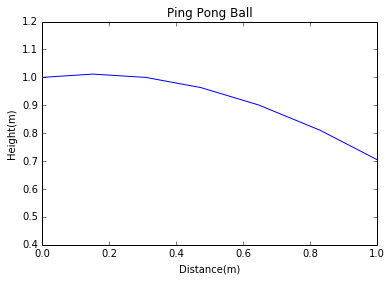

In [2]:
# Declare variables and lists
Dx = [0]
Dy = [0]
N0 = len(vxpoints)-1

# Set the initial for height and distance
sx = 0
sy = 1

Dx.append(sx)
Dy.append(sy)

# Use the trapezoidal rule to calculate the height and distance at each
# velocity step and put the distances in a list
for k in range(N0-1):
    sx += (vxpoints[k] + vxpoints[k+1])*h/2
    sy += (vypoints[k] + vypoints[k+1])*h/2
    Dx.append(sx)
    Dy.append(sy)
    
plt.plot(Dx,Dy)
plt.ylim(0.4,1.2)
plt.xlim(0,1)
plt.xlabel("Distance(m)")
plt.ylabel("Height(m)")
plt.title("Ping Pong Ball")

### Results and Analysis
The figure above is the modelled trajectory of the ping pong ball that is being affected by drag and back spin. As seen above the curve is not a parabola, as would be expected if drag and spin were ignored. Another importance to notice is the fact that the initial position is 1 meter. This is due to the fact that when the ball was shot the initial velocity is 3 m/s and the angle is 9 degrees from the horizontal. Thus, if the trajectory was to be measures starting at y = 0m then the curve would be difficult to see and the fit from the trapezoid rule may not be as accurate.

### Exercise 4 - Effects of Backspin on a Basketball

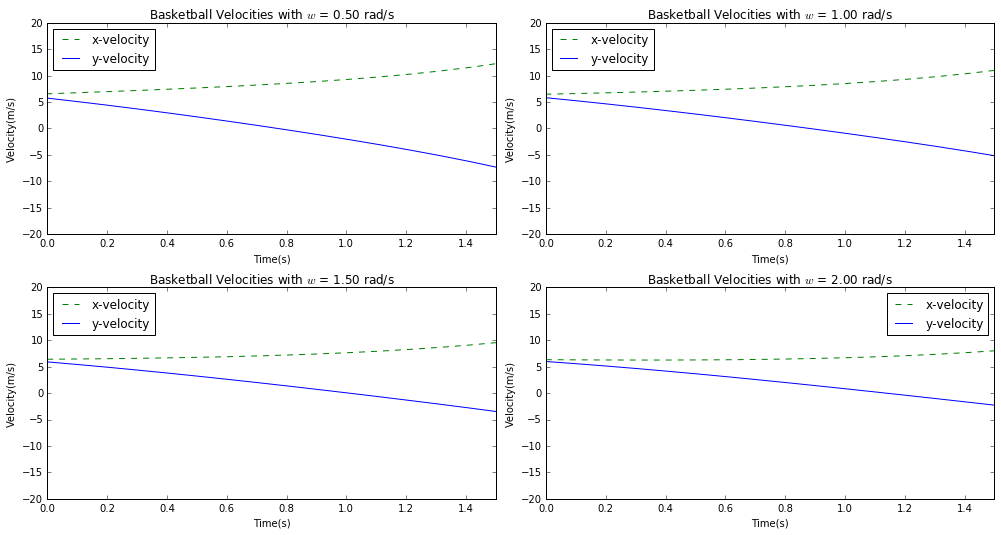

In [4]:
def velocity_bball_backspin(omega_1):
    '''Returns the x and y velocities of a basketball being shot at an angle 
    of 45 degrees at 9 m/s.
    
    omega_1 = rotational velocity of the basketball
    '''
    C1 = 0.54
    S0_m1 = 0.25
    M1 = 0.62
    theta1 = math.pi/4
    a1 = 0.0
    b1 = 10
    N1 = 100
    h1 = (b1-a1)/N1
    density1 = 1.225
    v01 = 9
    A1 = 0.045
    
    # Initial velocities
    vx1 = v01*math.cos(theta1)
    vy1 = v01*math.sin(theta1)

    tpoints1 = np.linspace(a1,b1,N1)
    t1 = [0]

    vxpoints1 = [vx1]
    vypoints1 = [vy1]
    
    # Calculate the drag for at the particular velocity for the x and y
    # direction then using the drag and euler method to 
    # calculate velocities over a certain number of iterations. Takes the 
    # velocities and creates a list that contains the 
    # values
    for i in tpoints1:
        if i > 3:
            break
        t1.append(i)
        v_tot1 = np.sqrt(vx1**2+vy1**2)
        theta_new1 = np.arcsin(vy1/v_tot1)
    
    
        f_temp1 = f_drag(C1,density1,A1,v_tot1)

        fx1 = f_temp1*math.cos(theta_new1)
        fy1 = f_temp1*math.sin(theta_new1)
    
        vx1 += h1*acc_x(fx1,M1,S0_m1,vy1,omega_1)
        vy1 += h1*acc_y(fy1,M1,S0_m1,vx1,omega_1)
    
        vxpoints1.append(vx1)
        vypoints1.append(vy1)
    return vxpoints1,vypoints1,t1


w1 = [0.5,1,1.5,2]

# Call the function above and evaluate at given backspin
v_x1,v_y1,t_1 = velocity_bball_backspin(w1[0])
v_x2,v_y2,t_2 = velocity_bball_backspin(w1[1])
v_x3,v_y3,t_3 = velocity_bball_backspin(w1[2])
v_x4,v_y4,t_4 = velocity_bball_backspin(w1[3])

# Plot velocities
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14, 7.5)) #(ax1, ax2, ax3, ax4)
ax1.plot(t_1,v_x1,"g--",label = "x-velocity")
ax1.plot(t_1,v_y1,label = "y-velocity")
ax1.set_ylabel("Velocity(m/s)")
ax1.set_xlabel("Time(s)")
ax1.set_ylim(-20,20)
ax1.set_xlim(0,1.5)
ax1.legend(loc = 'best')

ax2.plot(t_2,v_x2,"g--",label = "x-velocity")
ax2.plot(t_2,v_y2,label = "y-velocity")
ax2.set_ylabel("Velocity(m/s)")
ax2.set_xlabel("Time(s)")
ax2.set_ylim(-20,20)
ax2.set_xlim(0,1.5)
ax2.legend(loc = 'best')

ax3.plot(t_3,v_x3,"g--",label = "x-velocity")
ax3.plot(t_3,v_y3,label = "y-velocity")
ax3.set_ylabel("Velocity(m/s)")
ax3.set_xlabel("Time(s)")
ax3.set_ylim(-20,20)
ax3.set_xlim(0,1.5)
ax3.legend(loc = 'best')

ax4.plot(t_4,v_x4,"g--",label = "x-velocity")
ax4.plot(t_4,v_y4,label = "y-velocity")
ax4.set_ylabel("Velocity(m/s)")
ax4.set_xlabel("Time(s)")
ax4.set_ylim(-20,20)
ax4.set_xlim(0,1.5)
ax4.legend(loc = 'best')

ax1.set_title("Basketball Velocities with $w$ = 0.50 rad/s")
ax2.set_title("Basketball Velocities with $w$ = 1.00 rad/s")
ax3.set_title("Basketball Velocities with $w$ = 1.50 rad/s")
ax4.set_title("Basketball Velocities with $w$ = 2.00 rad/s")

plt.tight_layout()

### Results and Analysis
The four graphs above are similar to the graph that is described for the ping pong ball. Now when analyzing these graphs only one initial condition has been altered. The four graphs show both the x and y velocities of basketballs experiencing backspin. The top left is the curve that correlates to a basketball with a backspin of 0.5 rad/s. The graph shows that there is a positive acceleration in the x velocity and there is a negative acceleration in the y direction. Then the graph to the right is a backspin of 1.0 rad/s, the graph on the bottom left is backspin of 1.5 rad/s, and finally the graph at the bottom right is a backspin of 2.0 rad/s. All of the curve are experiencing acceleration similar to the first graph. Although, there is a difference as the backspin increases. As the backspin increases, the acceleration in both the x and the y components is much less. This allows for the ball to stay in the air longer with a larger backspin. 

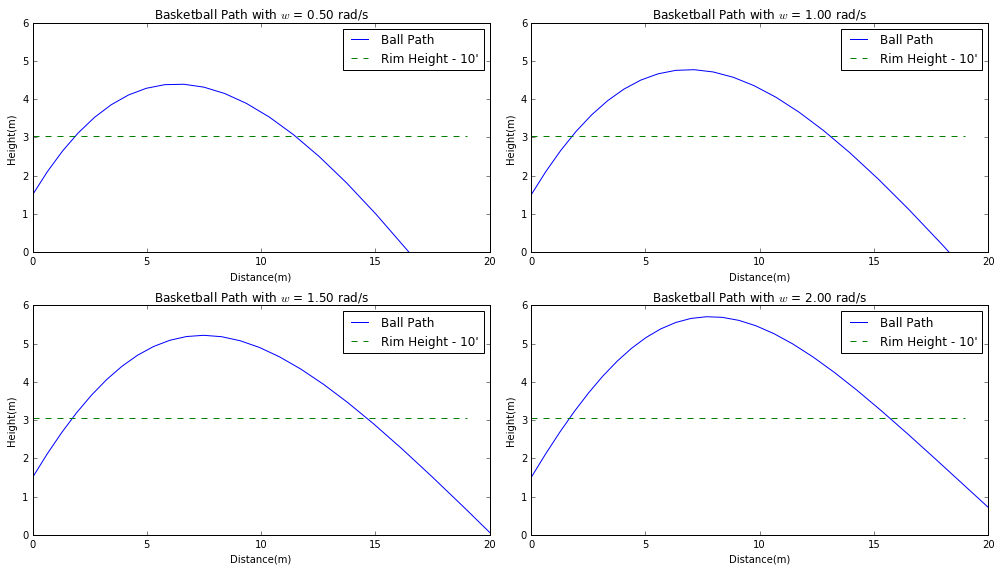

In [5]:
def path_bball_backspin(v_x,v_y):  
    '''Returns the x and y positions of a basketball being shot at an 
    angle of 45 degrees at 9 m/s.
    
    v_x = a list containing the x velocities
    v_y = a list containing the y velocities
    '''
    Dx1 = [0]
    Dy1 = [0]
    N2 = len(v_x)
    a1 = 0.0
    b1 = 10
    N1 = 100
    h1 = (b1-a1)/N1
    
    # Set the initial for height and distance
    sx2 = 0
    sy2 = 1.5

    Dx1.append(sx2)
    Dy1.append(sy2)
    
    # Use the trapezoidal rule to calculate the height and distance at 
    # each velocity step and put the distances in a list
    for k in range(N2-1):
        sx2 += (v_x[k] + v_x[k+1])*h1/2
        sy2 += (v_y[k] + v_y[k+1])*h1/2
        Dx1.append(sx2)
        Dy1.append(sy2)
    return Dx1,Dy1

# Call the function above and evaluate at given backspin
D_x1,D_y1 = path_bball_backspin(v_x1,v_y1)
D_x2,D_y2 = path_bball_backspin(v_x2,v_y2)
D_x3,D_y3 = path_bball_backspin(v_x3,v_y3)
D_x4,D_y4 = path_bball_backspin(v_x4,v_y4)

hoop = np.ones(20)*3.048

# Plot trajectories
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14, 8)) #(ax1, ax2, ax3, ax4)
ax1.plot(D_x1,D_y1,label = "Ball Path")
ax1.plot(hoop,"g--",label = "Rim Height - 10'")
ax1.set_xlabel("Distance(m)")
ax1.set_ylabel("Height(m)")
ax1.set_ylim(0,6)
ax1.set_xlim(0,20)
ax1.legend(loc = 'best')

ax2.plot(D_x2,D_y2,label = "Ball Path")
ax2.plot(hoop,"g--",label = "Rim Height - 10'")
ax2.set_xlabel("Distance(m)")
ax2.set_ylabel("Height(m)")
ax2.set_ylim(0,6)
ax2.set_xlim(0,20)
ax2.legend(loc = 'best')

ax3.plot(D_x3,D_y3,label = "Ball Path")
ax3.plot(hoop,"g--",label = "Rim Height - 10'")
ax3.set_xlabel("Distance(m)")
ax3.set_ylabel("Height(m)")
ax3.set_ylim(0,6)
ax3.set_xlim(0,20)
ax3.legend(loc = 'best')

ax4.plot(D_x4,D_y4,label = "Ball Path")
ax4.plot(hoop,"g--",label = "Rim Height - 10'")
ax4.set_xlabel("Distance(m)")
ax4.set_ylabel("Height(m)")
ax4.set_ylim(0,6)
ax4.set_xlim(0,20)
ax4.legend(loc = 'best')

ax1.set_title("Basketball Path with $w$ = 0.50 rad/s")
ax2.set_title("Basketball Path with $w$ = 1.00 rad/s")
ax3.set_title("Basketball Path with $w$ = 1.50 rad/s")
ax4.set_title("Basketball Path with $w$ = 2.00 rad/s")

plt.tight_layout()

### Results and Analysis
The four figures above model the trajectory of a basketball experiencing four different backspins. The top left being the smallest backsping at 0.5 rad/s and the bottom right being the greatest at 2.0 rad/s. The green line represents the height of a basketball hoop at 10 ft. From analyzing the graphs, the greater the backspin the higher and the further the ball traveled. As seen by the figures above where the spin is 2.0 rad/s and the height is approximately 6 m versus the bakspin of 0.5 rad/s with a height of approximately 4.5 m. This relates beck to the velocity curves because as seen in the graphs of the velocities above the acceleration was greater for the balls that had less backspin. Thus the greater the backspin, the smaller the acceleration and the greater the distance and height traveled by the ball while in motion. 

### Scientific Summary
In this code I was able to model the trajectory of a ping pong ball, thus by changing the necessary constants I could model any sphyrical ball, that is also being effected by the drag due to air and the spin while in the air. I was also able to determine how the backspin of a ball such as the basketball will effect its trajectory by either making it travel further and higher or the opposite. By doing so I can use this to put it to use in the field of athletics, for example if someone is not strong enough or powerful enough to give the ball adequate height and distance, by adding spin they may possible be able to do so.

### Personal Summary
Pesronally completing this project was satisfying. I was able to not only use my school and knowledge of physics to use for a real life situation, but to apply it to athletics. I also was able to gain a more indepth knowledge of how to use computational methods to solve problems that would be difficult and inaccurate to solve by hand. The final thing I have a much better understanding of, is how to present scientific projects and problems, which will be a very nice tool to have in the future.


### References
Team 379.“Physics of a Three Point Shot.”http://www.uphysicsc.com/2011-GM-B-379.PDF

Giordano, Nicholas J., and Hisao Nakanishi. Computational Physics. 1st ed. Dorling Kindersley, 1997.

“The Effect of Air on Baseball Pitches.” Apache2 Ubuntu Default Page: It Works, spiff.rit.edu/richmond/baseball/traj/traj.html